In [1]:
# normalized Margot's CVs

import numpy as np
import math
import matplotlib.pyplot as plt
import csv 
import re # for reading data from txt files

Natoms = 8
dim = 3
Nmin = 8
beta = 10

In [2]:
def read_FEdata_files(beta):
    fname = "Data/LJ"+str(Natoms) + "free_energy_beta"+str(beta)+".txt"

    # read free energy
    FE = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            FE.append(values)
        print(np.shape(FE))
        FE = np.array(FE)
        print(np.shape(FE))

    # read the bicubic matrix file
    fname = "Data/LJ"+str(Natoms) + "free_energy_bicubic_matrix_beta"+str(beta)+".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return FE,bicubic_matrix



def read_Mdata_files(entry,beta):
    fname = "Data/LJ"+str(Natoms) + "_M" + str(entry) + "_beta" + str(beta) + ".txt"

    # read free energy
    M = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            M.append(values)
        print(np.shape(M))
        M = np.array(M)
        print(np.shape(M))

    # read the bicubic matrix file
    fname = "Data/LJ"+str(Natoms) + "_M" + str(entry) + "_bicubic_matrix_beta" + str(beta) + ".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return M,bicubic_matrix

def bicubic_interpolation(bicubic_matrix,xgrid,ygrid,dx,dy,x,y):
    # FEval(x,y) = \sum_{i,j=0}^3 a(i,j)x^i y^j
    # FEder1(x,y) = \sum_{i=1}^3\sum{j=0}^3 a(i,j)ix^{i-1} y^j
    # FEder2(x,y) = \sum_{i=0}^3\sum{j=1}^3 a(i,j)jx^i y^{j-1}
    N1 = np.size(xgrid)
    N2 = np.size(ygrid)
   
    # find the cell
    i = min(max(0,int(np.floor((x - xgrid[0])/dx))),N1-2)
    j = min(max(0,int(np.floor((y - ygrid[0])/dy))),N2-2)
    x = (x - xgrid[0] - dx*i)/dx # x in cell rescaled to [0,1]
    y = (y - ygrid[0] - dy*j)/dy # y in cell rescaled to [0,1]
    
    ind = i + N1*j
    ishift = ind
    val = 0.0
    grad_x = 0.0
    grad_y = 0.0
    for i in range(4):
        for j in range(4):
            val = val + bicubic_matrix[ishift,i*4 + j]*(x**i)*(y**j)

#     for i in range(1,4):
#         for j in range(4):
#             grad_x = grad_x + bicubic_matrix[ishift,i*4 + j]*i*(x**(i-1))*(y**j)

#     for i in range(4):
#         for j in range(1,4):
#             grad_y = grad_y + bicubic_matrix[ishift,i*4 + j]*(x**i)*j*(y**(j-1))
    
#     grad_x = grad_x/dx
#     grad_y = grad_y/dy
    
    return val #,grad_x,grad_y


In [3]:
# draw ellipse
def compute_ellipse_data(x0,y0,M,scale):
    evals,evecs = np.linalg.eig(M)
    t = np.linspace(0,2*np.pi,50)
    x = x0 + scale*(evecs[0,0]*evals[0]*np.cos(t) + evecs[0,1]*evals[1]*np.sin(t))
    y = y0 + scale*(evecs[1,0]*evals[0]*np.cos(t) + evecs[1,1]*evals[1]*np.sin(t))
    return x,y


In [4]:
# read the parameter file
fname = "Data/bicubic_params.txt"
line_count = 0
with open(fname, "r") as f:
    for line in f:
        line = line.strip()
        line = line.strip(" \\n")
        line = re.sub(r"(-[0-9]+\.)", r" \1", line)
        print(line)
        line_count = line_count + 1
        if line_count == 1:
            N1 = int(line)
        elif line_count == 2:
            N2 = int(line)
        elif line_count == 3:
            h1 = float(line)
        elif line_count == 4:
            h2 = float(line)
        elif line_count == 5:    
            val1_min = float(line)
        elif line_count == 6: 
            val1_max = float(line)
        elif line_count == 7:
            val2_min = float(line)
        elif line_count == 8: 
            val2_max = float(line)
print(N1)
print(N2)
print(h1)
print(h2)
print(val1_min)
print(val1_max)
print(val2_min)
print(val2_max)


129
129
2.3315875305e-02
3.6207545266e-02
 -1.2049260393e+00
1.7795059996e+00
 -2.6719451760e+00
1.9626206180e+00
129
129
0.023315875305
0.036207545266
-1.2049260393
1.7795059996
-2.671945176
1.962620618


In [5]:
# 129
# 129
# 2.1847146972e-02
# 3.1926489060e-02
#  -1.1122455176e+00
# 1.6841892948e+00
#  -2.2383425234e+00
# 1.8482480763e+00

# read data files
FE, bicubic_matrix = read_FEdata_files(beta)
M11, M11_bicubic_matrix = read_Mdata_files(11,beta)
M12, M12_bicubic_matrix = read_Mdata_files(12,beta)
M22, M22_bicubic_matrix = read_Mdata_files(22,beta)


(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)


In [6]:
# visualize the free energy
CV1grid = np.linspace(val1_min,val1_max,N1)
CV2grid = np.linspace(val2_min,val2_max,N2)

def contourf_func(func,beta,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contourf(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel("CV1")
    plt.ylabel("CV2")
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    #axes.set_aspect(1)
    plt.savefig(fig_name)

In [7]:
# Margot's CV
dir = "CV_parameters_eigens_normalized/"
A1 = np.loadtxt(dir+"A1.csv", delimiter=',', dtype=float)
A2 = np.loadtxt(dir+"A2.csv", delimiter=',', dtype=float)
A3 = np.loadtxt(dir+"A3.csv", delimiter=',', dtype=float)
A4 = np.loadtxt(dir+"A4.csv", delimiter=',', dtype=float)
b1 = np.loadtxt(dir+"b1.csv", delimiter=',', dtype=float)
b2 = np.loadtxt(dir+"b2.csv", delimiter=',', dtype=float)
b3 = np.loadtxt(dir+"b3.csv", delimiter=',', dtype=float)
b4 = np.loadtxt(dir+"b4.csv", delimiter=',', dtype=float)

def myELU(x):
    zz = np.zeros_like(x)
    return np.maximum(x,zz) + np.minimum(np.exp(x)-1.0,zz)

def Dist_Sq_Matrix(x): # matrix of distances squared
    Na = np.size(x,axis = 1)
    D2 = np.zeros((Na,Na))
    for j in range(Na):
        D2[j,:] = (x[0,:]-x[0,j])**2 + (x[1,:]-x[1,j])**2 + (x[2,:]-x[2,j])**2
    return D2

def sort_coord_num(x):
    Na = np.size(x,axis = 1)
    D2 = Dist_Sq_Matrix(x)
    coord_num = np.zeros((Na,))
    for j in range(Na):
        ind = np.setdiff1d(range(Na),np.array([j]))
        aux = (D2[j,ind]/2.25)**4
        coord_num[j] = np.sum((np.ones((1,Na-1))-aux)/(np.ones((1,Na-1))-aux**2))
    return np.sort(coord_num) 
            
def CV(xyz):
    sort_cnum = sort_coord_num(xyz)
    w1 = myELU(np.matmul(A1,sort_cnum) + b1)
    w2 = myELU(np.matmul(A2,w1) + b2)
    w3 = myELU(np.matmul(A3,w2) + b3)
    w4 = np.matmul(A4,w3) + b4
    return w4


In [8]:
# load the list of minima and saddles of LJ7 in 2D
XYZlist = np.loadtxt("LJ8data/min_xyz.csv", delimiter=',', dtype=float)
# format: each row x0,x1,...,x7,y0,y1,...,y7,z0,z1,...,z7
CVlist = np.zeros((Nmin,2))
for j in range(Nmin):
    CVlist[j,0],CVlist[j,1] = CV(np.reshape(XYZlist[3*j:3*(j+1),:],(dim,Natoms)))


In [9]:
#load MEP
MEPxyz = np.loadtxt("LJ8data/StringLJ8_Min2-Min4.csv", delimiter=',', dtype=float)
# format: each row x0,y0,z0,x1,y1,z1,....,x7,y7,z7
Nmep = np.size(MEPxyz,axis=0)
CVmep = np.zeros((Nmep,2))
for j in range(Nmep):
    CVmep[j,0],CVmep[j,1] = CV(np.transpose(np.reshape(MEPxyz[j,:],(Natoms,dim))))


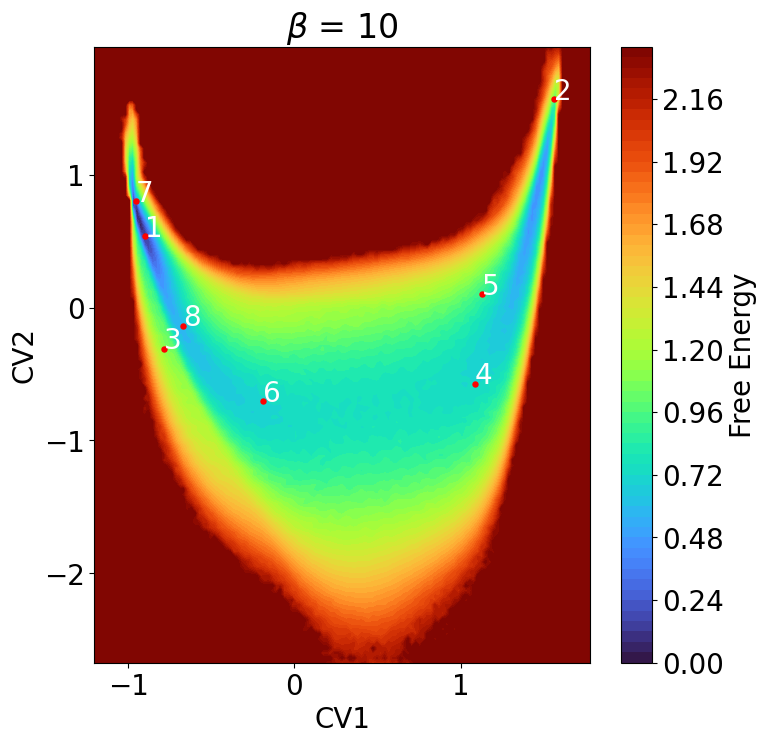

In [10]:
fig_name = "Figures/FE_LJ"+str(Natoms)+"in"+str(dim)+"Dbeta" + str(beta) + "_binning.pdf"
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
plt.contourf(CV1grid,CV2grid,FE, levels=60, cmap='turbo')
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
plt.scatter(CVlist[:,0],CVlist[:,1],s = 13, c = 'red')
# plt.contour(CV1grid,CV2grid,FE, levels=[0.5])

# plt.plot(CVmep[:,0],CVmep[:,1],color = "white")
# print(CVlist)
for j in range(Nmin):
    plt.text(CVlist[j,0],CVlist[j,1],str(j+1),color = 'white')
#     #axes.set_aspect(1)
plt.savefig(fig_name)

In [11]:
def visualize_diffusion_matrix(func,M11,M12,M22,beta,step,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contour(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel("CV1")
    plt.ylabel("CV2")
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    N2,N1 = np.shape(func)
    scale = 3e-4
    for i in range(0,N1,step):
        for j in range(0,N2,step):
            M = np.array([[M11[j,i],M12[j,i]],[M12[j,i],M22[j,i]]]);
            edata0,edata1 = compute_ellipse_data(x[i],y[j],M,scale)
            plt.plot(edata0,edata1,color = "black",linewidth = 0.5)
    plt.savefig(fig_name)

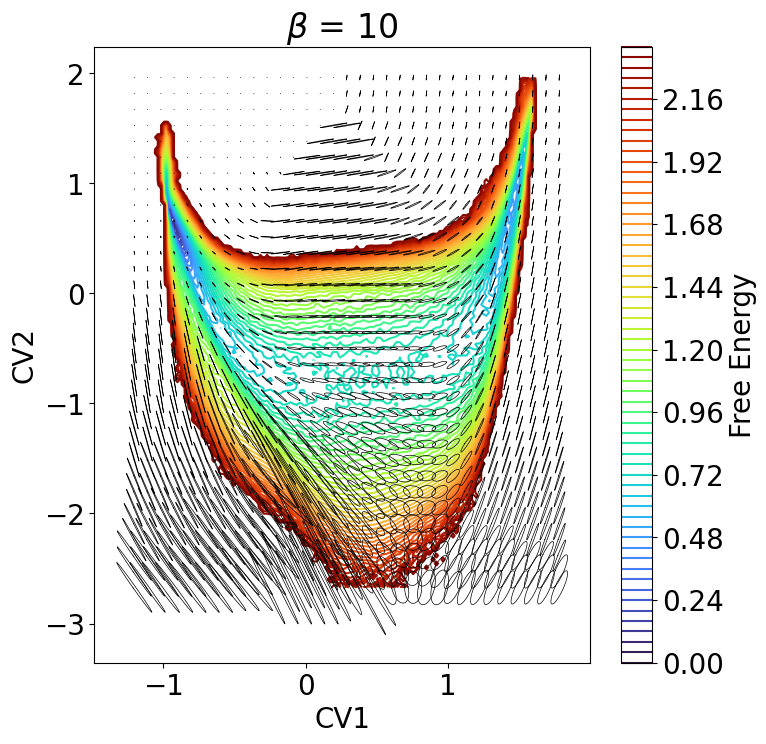

In [12]:
step = 4
fname = "Figures/LJ"+str(Natoms)+"_FE_DiffMatr_beta"+str(beta)+".pdf"
visualize_diffusion_matrix(FE,M11,M12,M22,beta,step,CV1grid,CV2grid,"Free Energy",fname)

Parameters for set A
1.4907376502647303 1.1156981470306966
0.15 1.0
0.6 0.04
0.008693626344839035
parameters for set B
-0.8985453607320371 0.5362685308247025
-0.15 1.0
0.25 0.05
0.003996371205088857


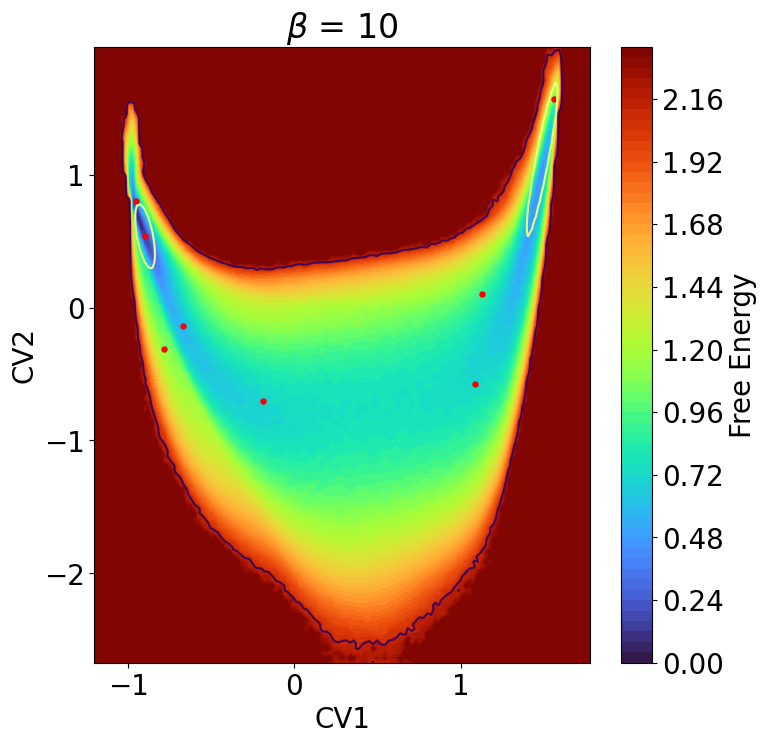

In [13]:
# Committor Problem
# fig_name = "Figures/FE_LJ"+str(Natoms)+"in"+str(dim)+"Dbeta" + str(beta) + "_binning.pdf"
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
plt.contourf(CV1grid,CV2grid,FE, levels=60, cmap='turbo')
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
plt.scatter(CVlist[:,0],CVlist[:,1],s = 13, c = 'red')


cv1mesh,cv2mesh = np.meshgrid(CV1grid,CV2grid)

x0A = CVlist[1,0]-0.07
y0A = CVlist[1,1]-0.45
vxA = 0.15
vyA = 1.0
r0A = 0.6
r1A = 0.04
print("Parameters for set A")
print(x0A,y0A)
print(vxA,vyA)
print(r0A,r1A)

def Bellipse(x,y,x0,y0,vx,vy,r0,r1):
    aux1 = ((x-x0)*vx + (y-y0)*vy)/r0
    aux2 = ((x-x0)*vy - (y-y0)*vx)/r1
    return aux1*aux1 + aux2*aux2
Afunc = Bellipse(cv1mesh,cv2mesh,x0A,y0A,vxA,vyA,r0A,r1A)
print(np.min(Afunc))
plt.contour(cv1mesh,cv2mesh,Afunc,[1.0],cmap='Wistia')


x0B = CVlist[0,0]
y0B = CVlist[0,1]
vxB = -0.15
vyB = 1.0
r0B = 0.25
r1B = 0.05

print("parameters for set B")
print(x0B,y0B)
print(vxB,vyB)
print(r0B,r1B)

Bfunc = Bellipse(cv1mesh,cv2mesh,x0B,y0B,vxB,vyB,r0B,r1B)
print(np.min(Bfunc))
plt.contour(cv1mesh,cv2mesh,Bfunc,[1.0],cmap='Wistia')

fe_outer = 2.1
plt.contour(CV1grid,CV2grid,FE, levels=[fe_outer])


4
244
106
1446


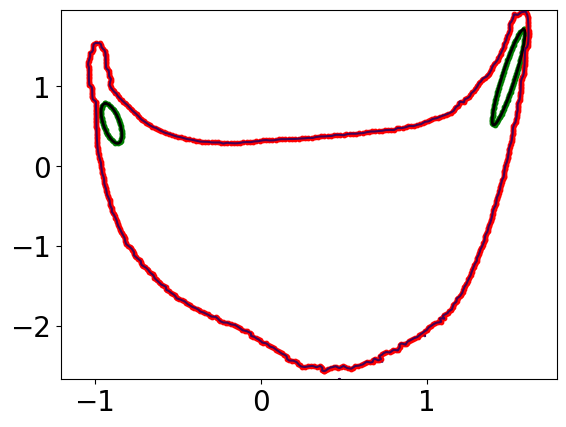

In [14]:
from distmesh import *
from FEM_TPT import *

# the desired size of mesh edge
h = 0.02
Nt = 50
t = np.linspace(0,2*np.pi,Nt)

def ellipse_contour(t,x0,y0,vx,vy,r0,r1):
    vec0 = np.array([vx,vy])
    vec1 = np.array([-vec0[1],vec0[0]]);
    x = x0 + (r0*vec0[0]*np.cos(t) + vec1[0]*r1*np.sin(t))
    y = y0 + (r0*vec0[1]*np.cos(t) + vec1[1]*r1*np.sin(t))
    return x,y
    
# Set A around minimum 1
x,y = ellipse_contour(t,x0A,y0A,vxA,vyA,r0A,r1A)
plt.plot(x,y,color = "black",linewidth = 2)

bb = np.concatenate((np.reshape(x,(Nt,1)),np.reshape(y,(Nt,1))),axis = 1)
Abdry = reparametrization(bb,h)
plt.scatter(Abdry[:,0],Abdry[:,1],s = 10, c = 'green')


# set B around minimum 0
x,y = ellipse_contour(t,x0B,y0B,vxB,vyB,r0B,r1B)
plt.plot(x,y,color = "black",linewidth = 2)
bb = np.concatenate((np.reshape(x,(Nt,1)),np.reshape(y,(Nt,1))),axis = 1)
Bbdry = reparametrization(bb,h)
plt.scatter(Bbdry[:,0],Bbdry[:,1],s = 10, c = 'green')

# the outer boundary
outer_bdry = plt.contour(CV1grid,CV2grid,FE, [fe_outer])
level_set = outer_bdry.allsegs[0]
print(len(level_set))
Obdry = level_set[1]
Obdry = reparametrization(Obdry,h)
plt.scatter(Obdry[:,0],Obdry[:,1],s = 10, c = 'red')

dirname = "FEMdataBETA"+str(beta)+"/"
fbdry_name = ["A_bdry.csv","B_bdry.csv","O_bdry.csv"]
Abdry.tofile(dirname+fbdry_name[0], sep = ',')
Bbdry.tofile(dirname+fbdry_name[1], sep = ',')
Obdry.tofile(dirname+fbdry_name[2], sep = ',')

print(np.size(Abdry))
print(np.size(Bbdry))
print(np.size(Obdry))


OmegaAB: Npts =  8563  Ntri =  15336
A: NptsA =  739  NtriA =  1228
B: NptsB =  313  NtriB =  520


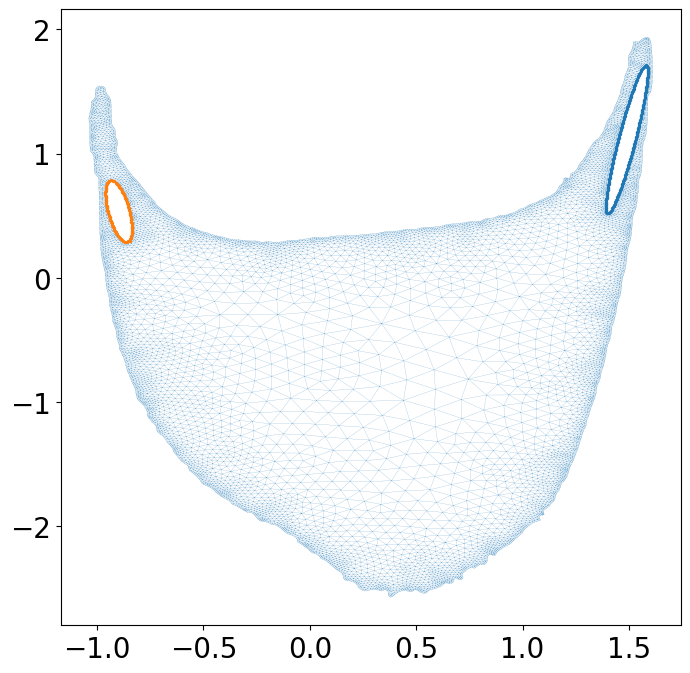

In [15]:
# The triangulation is done using Darren Engwirda's triangulation package mesh2D
# https://github.com/dengwirda/mesh2d?tab=readme-ov-file

# Read the triangulation files
Aind = np.loadtxt(dirname +"Abdry.csv", delimiter=',', dtype=int)
Bind = np.loadtxt(dirname +"Bbdry.csv", delimiter=',', dtype=int)
pts = np.loadtxt(dirname +"pts.csv", delimiter=',', dtype=float)
ptsA = np.loadtxt(dirname +"ptsA.csv", delimiter=',', dtype=float)
ptsB = np.loadtxt(dirname +"ptsB.csv", delimiter=',', dtype=float)
tri = np.loadtxt(dirname +"tri.csv", delimiter=',', dtype=int)
triA = np.loadtxt(dirname +"triA.csv", delimiter=',', dtype=int)
triB = np.loadtxt(dirname +"triB.csv", delimiter=',', dtype=int)

Npts = np.size(pts,axis = 0)
Ntri = np.size(tri,axis = 0)
NptsA = np.size(ptsA,axis = 0)
NtriA = np.size(triA,axis = 0)
NptsB = np.size(ptsB,axis = 0)
NtriB = np.size(triB,axis = 0)

print("OmegaAB: Npts = ",Npts," Ntri = ",Ntri)
print("A: NptsA = ",NptsA," NtriA = ",NtriA)
print("B: NptsB = ",NptsB," NtriB = ",NtriB)

plt.figure(figsize=(8,8))
plt.triplot(pts[:,0],pts[:,1],tri,linewidth=0.1)
plt.scatter(pts[Aind,0],pts[Aind,1],s = 2)
plt.scatter(pts[Bind,0],pts[Bind,1],s = 2)
# plt.savefig('LJ72D_trimesh_ABellipses.pdf')


In [16]:
# ise the bicubic interpolation to interpolate the free energy and the diffusion matrix 
# to the nodes of the triangulated mesh

# FE7, bicubic_matrix7 = read_FEdata_files(beta)
# M11_7, M11_bicubic_matrix7 = read_Mdata_files(11,beta)
# M12_7, M12_bicubic_matrix7 = read_Mdata_files(12,beta)
# M22_7, M22_bicubic_matrix7 = read_Mdata_files(22,beta)

Fpts = np.zeros((Npts,))
M11pts = np.zeros((Npts,))
M12pts = np.zeros((Npts,))
M22pts = np.zeros((Npts,))
FptsA = np.zeros((NptsA,))
FptsB = np.zeros((NptsB,))

for j in range(Npts):
    Fpts[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M11pts[j] = bicubic_interpolation(M11_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M12pts[j] = bicubic_interpolation(M12_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M22pts[j] = bicubic_interpolation(M22_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    
for j in range(NptsA):
    FptsA[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,ptsA[j,0],ptsA[j,1])

for j in range(NptsB):
    FptsB[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,ptsB[j,0],ptsB[j,1])

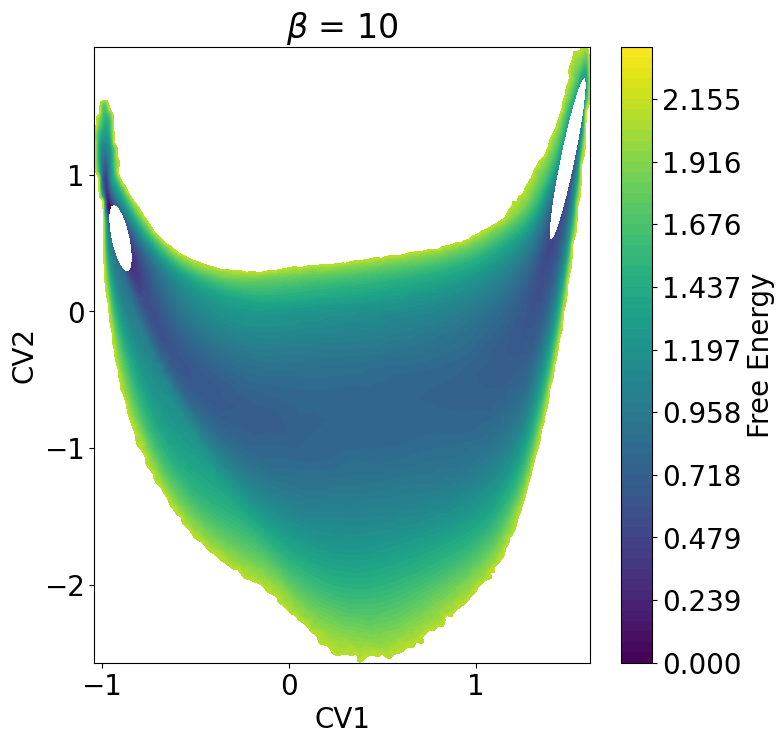

In [17]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,Fpts,np.linspace(np.min(FE),np.max(FE),60) )
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


In [18]:
# find the committor
q = FEM_committor_solver_var_diffusion_matrix(pts,tri,Aind,Bind,Fpts,M11pts,M12pts,M22pts,beta)
print(np.min(q))
print(np.max(q))

-8.287070559839054e-07
1.000004388043


In [19]:
q = np.clip(q,0.0,1.0)

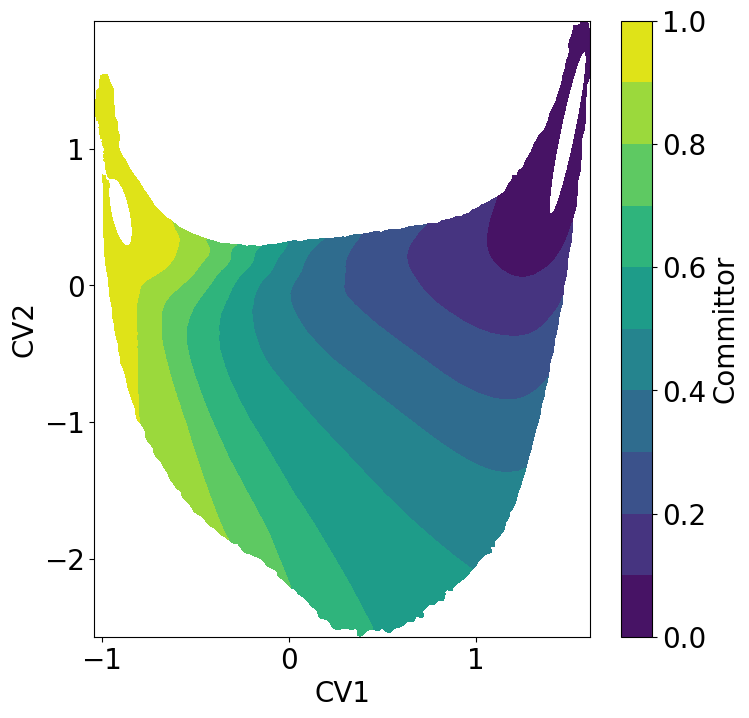

In [20]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,q,np.array([np.min(q),0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,np.max(q)]))
plt.colorbar(label="Committor", orientation="vertical")
plt.xlabel("CV1")
plt.ylabel("CV2")
# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
fname = "Figures/Committor_min01_LDA23_BETA"+str(beta)+".pdf"
plt.savefig(fname)

In [21]:
def read_bins_data(fname):
    # read free energy
    bins = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            # print(line)
            values = [int(value) for value in line.split()]
            # print(values)
            bins.append(values)
        print(np.shape(bins))
        bins = np.array(bins)
        print(np.shape(bins))
    
    return bins

In [106]:
BETA = 15
fname = "Data/Rtraj_bins_beta"+str(BETA)+".txt"
bins = read_bins_data(fname)
muR = np.array(np.transpose(bins),dtype = float)
Z = np.sum(muR)*h1*h2
print(Z)
muR = muR/Z
for i in range(N2):
    for j in range(N1):
        if bins[j,i] == 0:
            muR[i,j] = np.nan

(129, 129)
(129, 129)
327395.41641840234


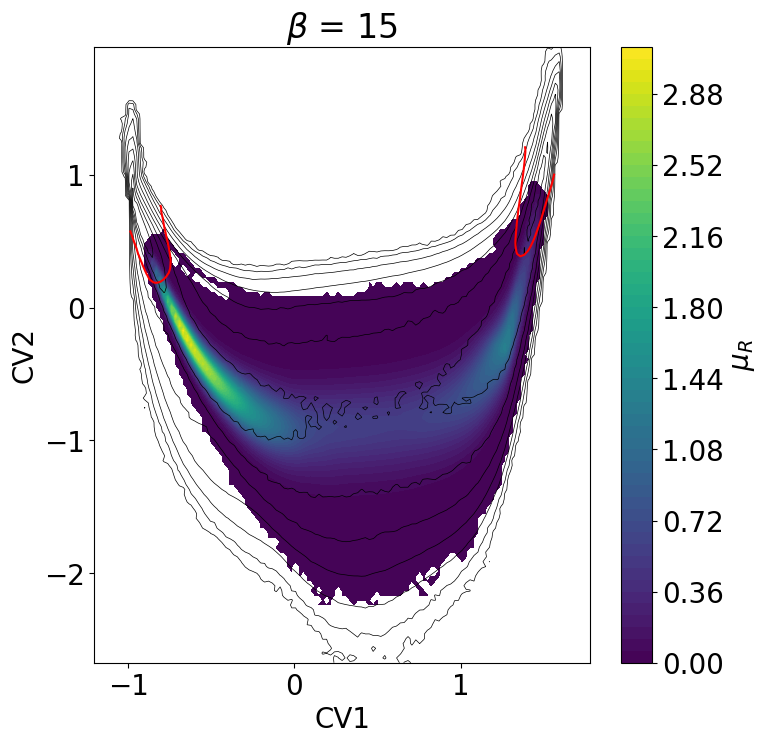

In [110]:
plt.figure(figsize=(8,8))
plt.contourf(CV1grid,CV2grid,muR,levels = 60)
cbar = plt.colorbar()
cbar.set_label(r'$\mu_R$', size=20)
plt.contour(CV1grid,CV2grid,FE, levels=10, colors='black', linewidths=0.5) #cmap='turbo')
plt.tricontour(pts[:,0], pts[:,1],tri,q,np.array([3.0e-2,0.97]),colors = 'red')
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(BETA))
axes=plt.gca()
figname = "Figures/ProbDensityRtraj_beta"+str(BETA)+".pdf"
plt.savefig(figname)

In [112]:
BETA = 10
fname = "Data/Rtraj_bins_beta"+str(BETA)+".txt"
bins = read_bins_data(fname)
muR = np.array(np.transpose(bins),dtype = float)
Z = np.sum(muR)*h1*h2
print(Z)
muR = muR/Z
for i in range(N2):
    for j in range(N1):
        if bins[j,i] == 0:
            muR[i,j] = np.nan

(129, 129)
(129, 129)
88863.00687633769


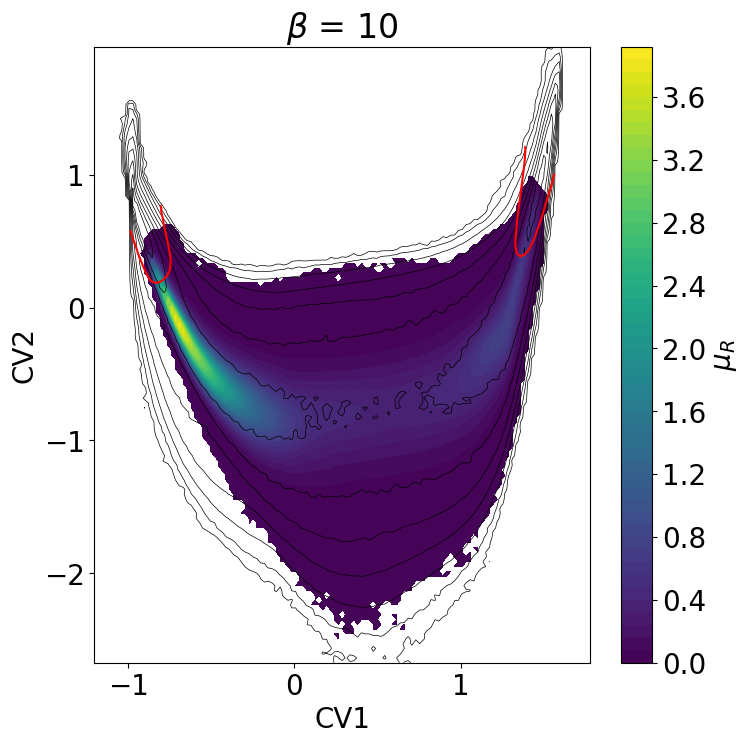

In [114]:
plt.figure(figsize=(8,8))
plt.contourf(CV1grid,CV2grid,muR,levels = 60)
cbar = plt.colorbar()
cbar.set_label(r'$\mu_R$', size=20)
plt.contour(CV1grid,CV2grid,FE, levels=10, colors='black', linewidths=0.5) #cmap='turbo')
plt.tricontour(pts[:,0], pts[:,1],tri,q,np.array([3.0e-2,0.97]),colors = 'red')
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(BETA))
axes=plt.gca()
figname = "Figures/ProbDensityRtraj_beta"+str(BETA)+".pdf"
plt.savefig(figname)

In [117]:
BETA = 20
fname = "Data/Rtraj_bins_beta"+str(BETA)+".txt"
bins = read_bins_data(fname)
muR = np.array(np.transpose(bins),dtype = float)
Z = np.sum(muR)*h1*h2
print(Z)
muR = muR/Z
for i in range(N2):
    for j in range(N1):
        if bins[j,i] == 0:
            muR[i,j] = np.nan

(129, 129)
(129, 129)
399134.24506246584


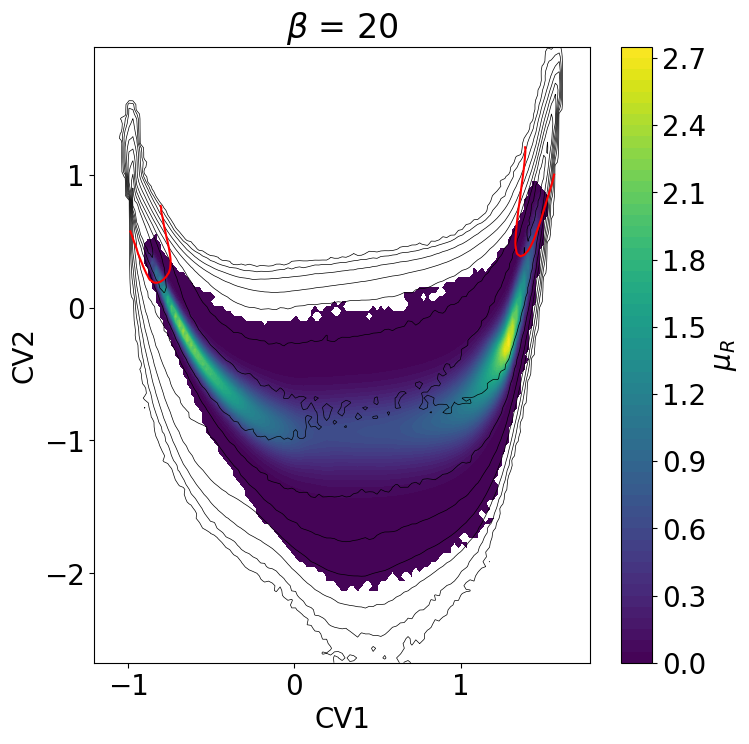

In [119]:
plt.figure(figsize=(8,8))
plt.contourf(CV1grid,CV2grid,muR,levels = 60)
cbar = plt.colorbar()
cbar.set_label(r'$\mu_R$', size=20)
plt.contour(CV1grid,CV2grid,FE, levels=10, colors='black', linewidths=0.5) #cmap='turbo')
plt.tricontour(pts[:,0], pts[:,1],tri,q,np.array([3.0e-2,0.97]),colors = 'red')
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(BETA))
axes=plt.gca()
figname = "Figures/ProbDensityRtraj_beta"+str(BETA)+".pdf"
plt.savefig(figname)